# Advection PDE: Generating Training and Test Data

In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')



### Importing External Libraries

import numpy                             as np
import pandas                            as pd


### Importing Matplotlib and Its Style

import matplotlib.pyplot                 as plt

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/zoomed.mplstyle'))
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


from scipy.integrate import solve_ivp
import pyDOE
# from PCAfold         import PCA          as PCAA

3.9.12 (main, Mar 26 2022, 15:51:13) 
[Clang 12.0.0 (clang-1200.0.32.29)]


Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


## Defining Input Variables

In [2]:
OutputDir   = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/Advection_10Cases/')
FigDir      = os.path.join(WORKSPACE_PATH, '../Desktop/Paper_Figures_Advect/')

n_training  = 100
n_test      = 10  

xtN         = [256, 100]
xtMinVals   = [0., 0.]
xtMaxVals   = [2., 1.]

MuMinMax    = [0.05, 1.] 


ColorVec    = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']

try:
    os.makedirs(OutputDir)
except OSError as e:
    pass

OutputDir += '/Orig/'
try:
    os.makedirs(OutputDir)
except OSError as e:
    pass

TempDir = OutputDir+'/train/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

TempDir = TempDir+'/ext/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

TempDir = OutputDir+'/test/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

TempDir = TempDir+'/ext/'
try:
    os.makedirs(TempDir)
except OSError as e:
    pass

## ODE

In [3]:
def fOrig(t, x):
        
    x_ = x - Params[0] * t
    
    y  = 1. / np.sqrt(Params[2]*np.pi) * np.exp( - (x_-Params[1])**2 / Params[2] )
    
    return y


Params = np.array([1.0, 1.0, 0.0002], dtype=np.float64)

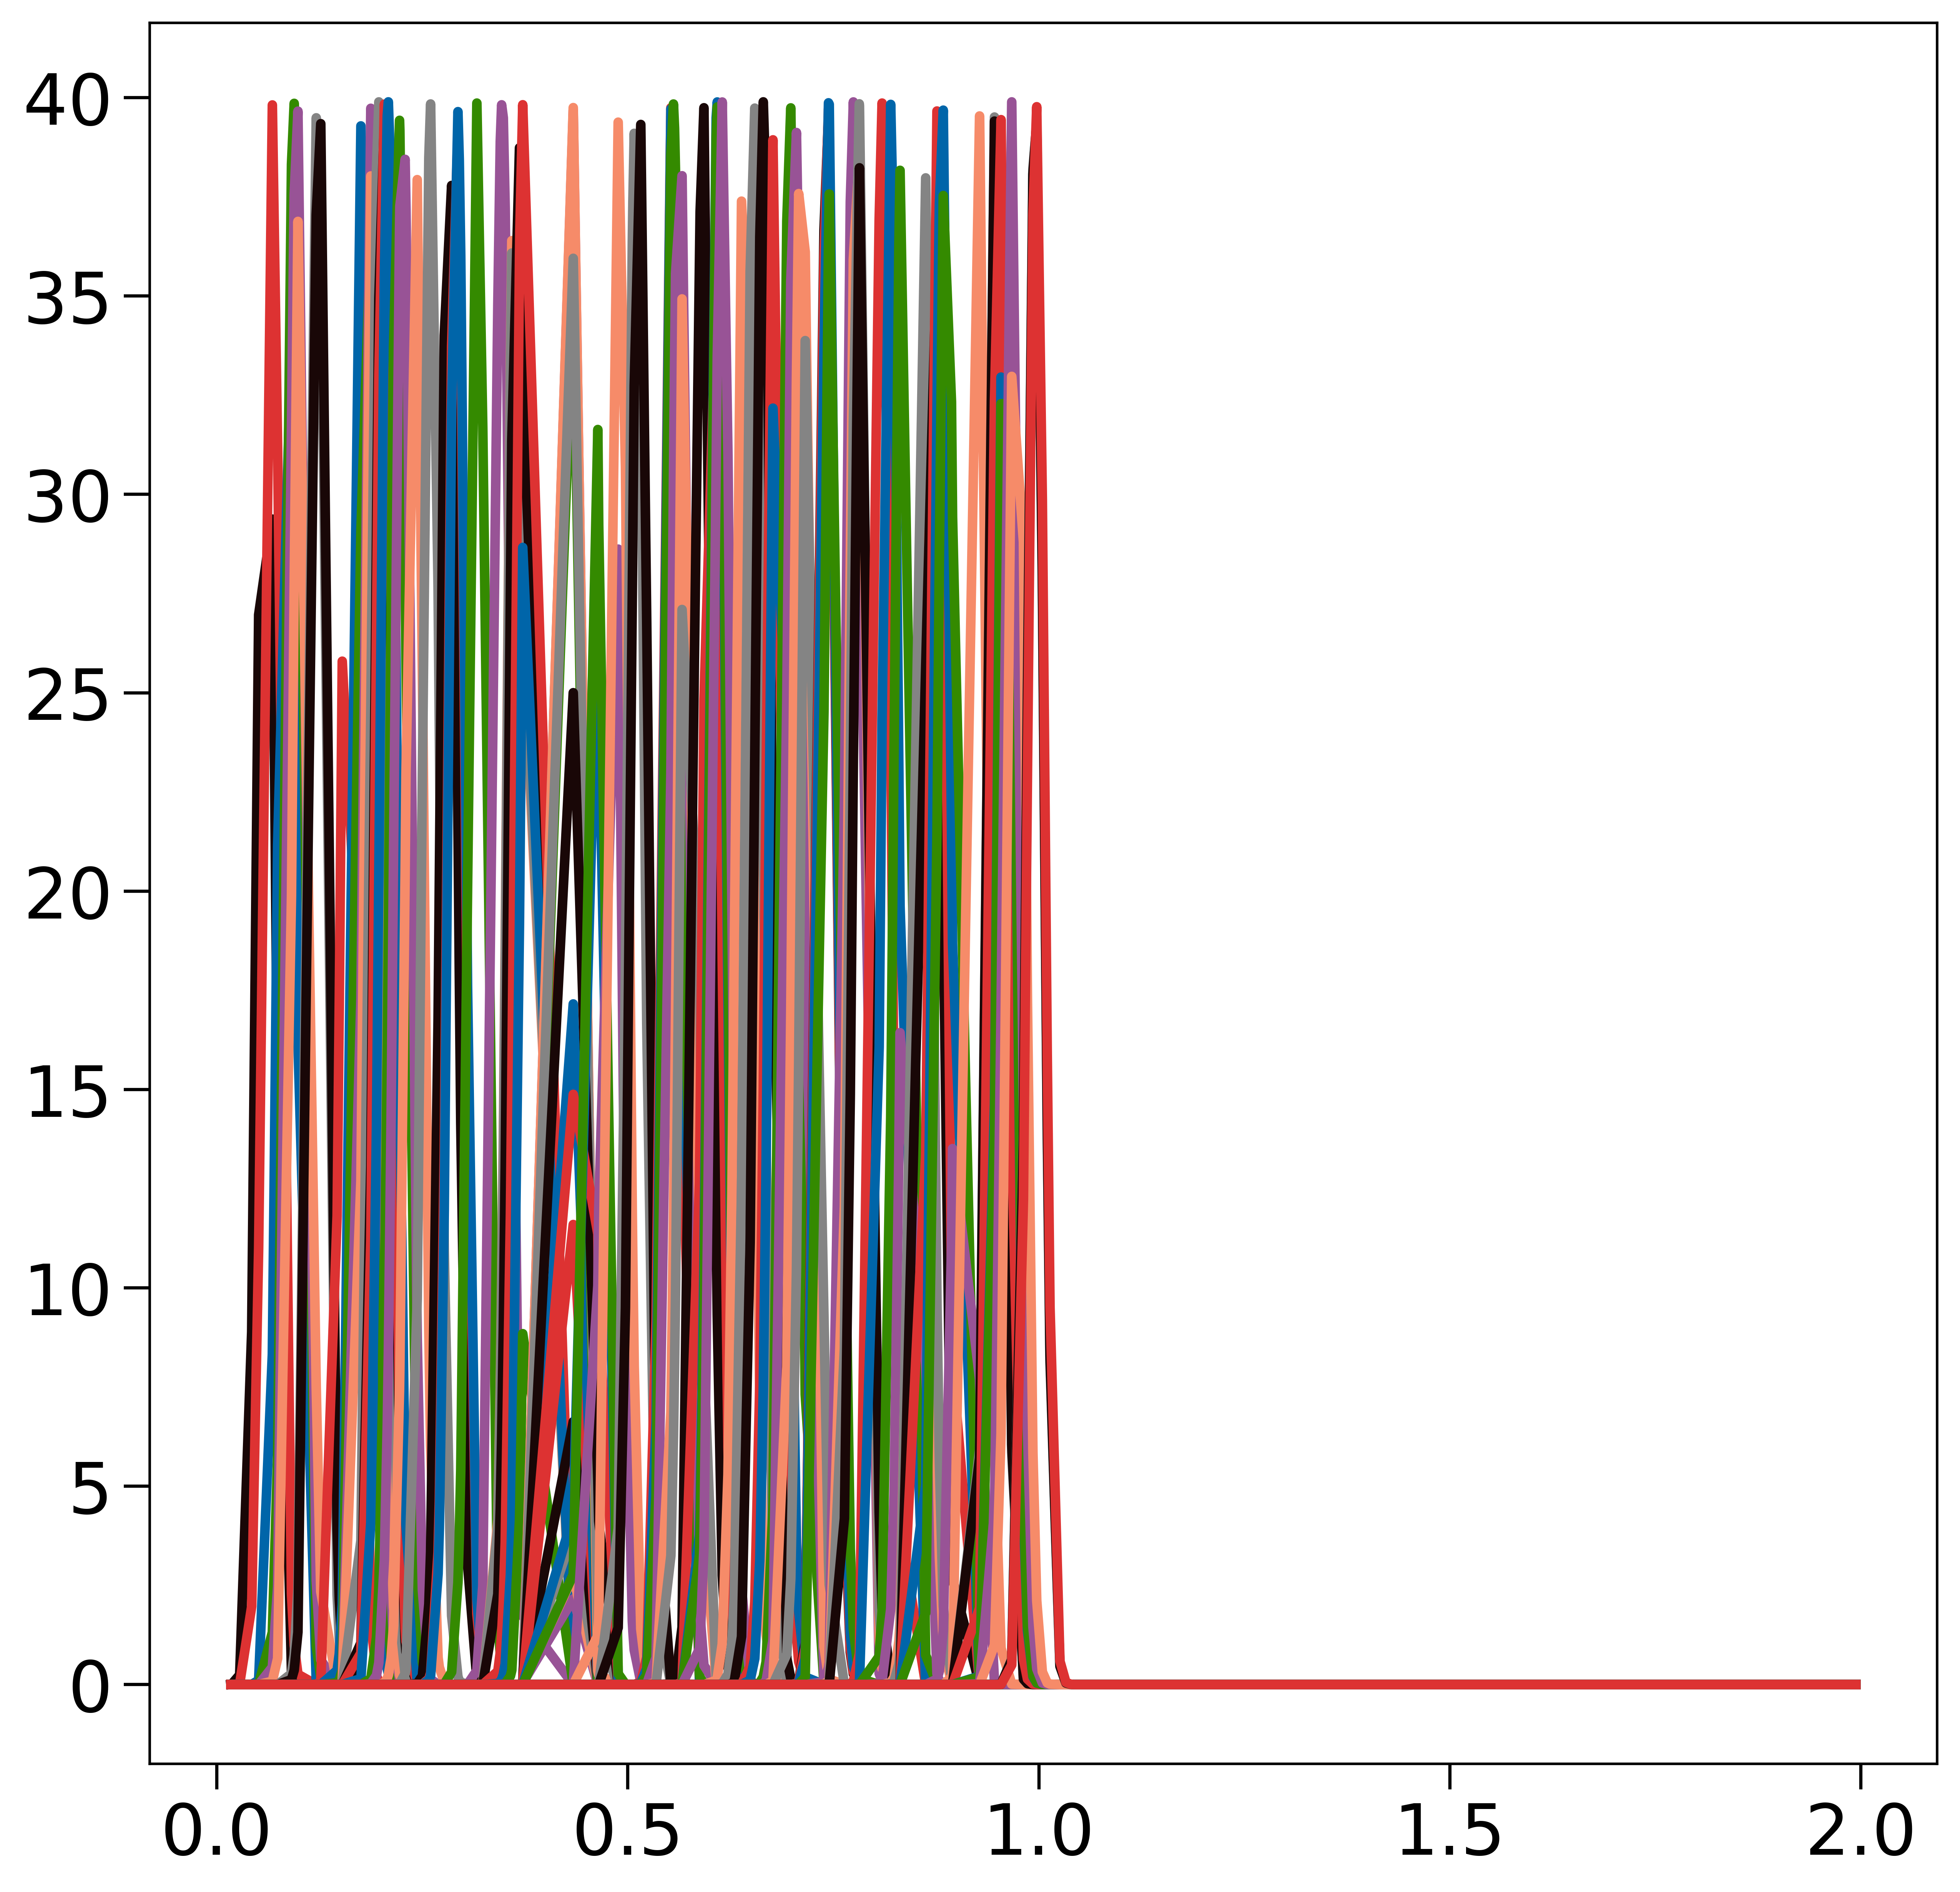

In [4]:
xnames = ['x'+str(i+1) for i in range(xtN[0])]
unames = ['u'+str(i+1) for i in range(xtN[0])]

muVec  = np.sort( np.random.rand(n_training) * (MuMinMax[1]  - MuMinMax[0])  + MuMinMax[0]  )
np.savetxt(OutputDir+'/train/ext/Mu.csv', muVec[...,np.newaxis])

x0Vec  = np.sort( np.random.rand(xtN[0])     * (xtMaxVals[0] - xtMinVals[0]) + xtMinVals[0] )
np.savetxt(OutputDir+'/train/ext/x0.csv', x0Vec[...,np.newaxis])

P      = xtN[0] * xtN[1]

u      = np.zeros((n_training,xtN[0]))
DF     = []
for i_case in range(n_training):
    
    Params[1]   = muVec[i_case]
    u[i_case,:] = fOrig(0, x0Vec)

    DF_         = pd.DataFrame( np.tile(u[i_case,:][np.newaxis,...], (P,1)), columns=unames)
    
    xVec        = np.random.rand(P) * (xtMaxVals[0] - xtMinVals[0]) + xtMinVals[0]
    tVec        = np.random.rand(P) * (xtMaxVals[1] - xtMinVals[1]) + xtMinVals[1]
    
    DF_['t']    = tVec
    DF_['x']    = xVec
    
    s           = fOrig(tVec, xVec)
    
    DF_['s']    = s
    
    DF_[['t']+['x']+['s']].to_csv(OutputDir+'/train/ext/y.csv.'+str(i_case+1), index=False)
    
    DF.append(DF_)

plt.plot(x0Vec, u.T)

DF = pd.concat(DF, axis=0)

np.savetxt(OutputDir+'/train/ext/u.csv', u)

In [5]:
DF

,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,...,u250,u251,u252,u253,u254,u255,u256,t,x,s
0,0.004455,0.006561,0.244589,8.889997,26.965107,29.376511,14.427995,0.316315,0.108318,0.020323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.764246,1.771392,0.000000
1,0.004455,0.006561,0.244589,8.889997,26.965107,29.376511,14.427995,0.316315,0.108318,0.020323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488118,0.592701,0.001744
2,0.004455,0.006561,0.244589,8.889997,26.965107,29.376511,14.427995,0.316315,0.108318,0.020323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130154,1.650473,0.000000
3,0.004455,0.006561,0.244589,8.889997,26.965107,29.376511,14.427995,0.316315,0.108318,0.020323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.735405,1.821913,0.000000
4,0.004455,0.006561,0.244589,8.889997,26.965107,29.376511,14.427995,0.316315,0.108318,0.020323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.762522,1.848122,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195490,0.602145,0.000000
25596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851706,0.065352,0.000000
25597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239555,0.638345,0.000000
25598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054806,0.062439,0.000000


## Splitting and Writing Training Data

In [6]:
from sklearn.model_selection import train_test_split

try:
    os.makedirs(OutputDir+'/valid/')
except:
    pass

In [7]:
data_id    = 'pts'

DataInput  = DF[unames+['t']+['x']]
DataOutput = DF[['t']+['x']+['s']]
                          
n_points   = len(DataInput)

idx                  = np.arange(n_points)
train_idx, valid_idx = train_test_split(idx, test_size=0.2, random_state=42)

n_valid              = len(valid_idx)
n_train              = len(train_idx)

try:
    os.makedirs(OutputDir+'/train/'+data_id+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/valid/'+data_id+'/')
except:
    pass

DataInput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Input.csv', index=False)
DataInput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Input.csv', index=False)

DataOutput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Output.csv', index=False)
DataOutput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Output.csv', index=False)

In [8]:
# data_id    = 'ics'

# t0Mat      = np.zeros((y0Mat.shape[0],1))
# u0Mat      = y0Mat

# DataInput  = pd.DataFrame(np.concatenate((t0Mat,u0Mat), axis=1), columns=['t','x','v'])
# DataOutput = pd.DataFrame(np.concatenate((t0Mat,u0Mat), axis=1), columns=['t','x','v'])
                          
# n_points   = len(DataInput)

# idx                  = np.arange(n_points)
# train_idx, valid_idx = train_test_split(idx, test_size=0.2, random_state=42)

# n_valid              = len(valid_idx)
# n_train              = len(train_idx)

# try:
#     os.makedirs(OutputDir+'/train/'+data_id+'/')
# except:
#     pass
# try:
#     os.makedirs(OutputDir+'/valid/'+data_id+'/')
# except:
#     pass

# DataInput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Input.csv', index=False)
# DataInput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Input.csv', index=False)

# DataOutput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Output.csv', index=False)
# DataOutput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Output.csv', index=False)

In [9]:
# data_id    = 'res'

# DataInput  = pd.DataFrame(np.concatenate((tMat,uMat), axis=1), columns=['t','x','v'])
# DataOutput = pd.DataFrame(np.concatenate((tMat,yMat*0.), axis=1), columns=['t','x','v'])
                          
# n_points   = len(DataInput)

# idx                  = np.arange(n_points)
# train_idx, valid_idx = train_test_split(idx, test_size=0.2, random_state=42)

# n_valid              = len(valid_idx)
# n_train              = len(train_idx)

# try:
#     os.makedirs(OutputDir+'/train/'+data_id+'/')
# except:
#     pass
# try:
#     os.makedirs(OutputDir+'/valid/'+data_id+'/')
# except:
#     pass

# DataInput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Input.csv', index=False)
# DataInput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Input.csv', index=False)

# DataOutput.iloc[train_idx].to_csv(OutputDir+'/train/'+data_id+'/Output.csv', index=False)
# DataOutput.iloc[valid_idx].to_csv(OutputDir+'/valid/'+data_id+'/Output.csv', index=False)

## Generating Test Data

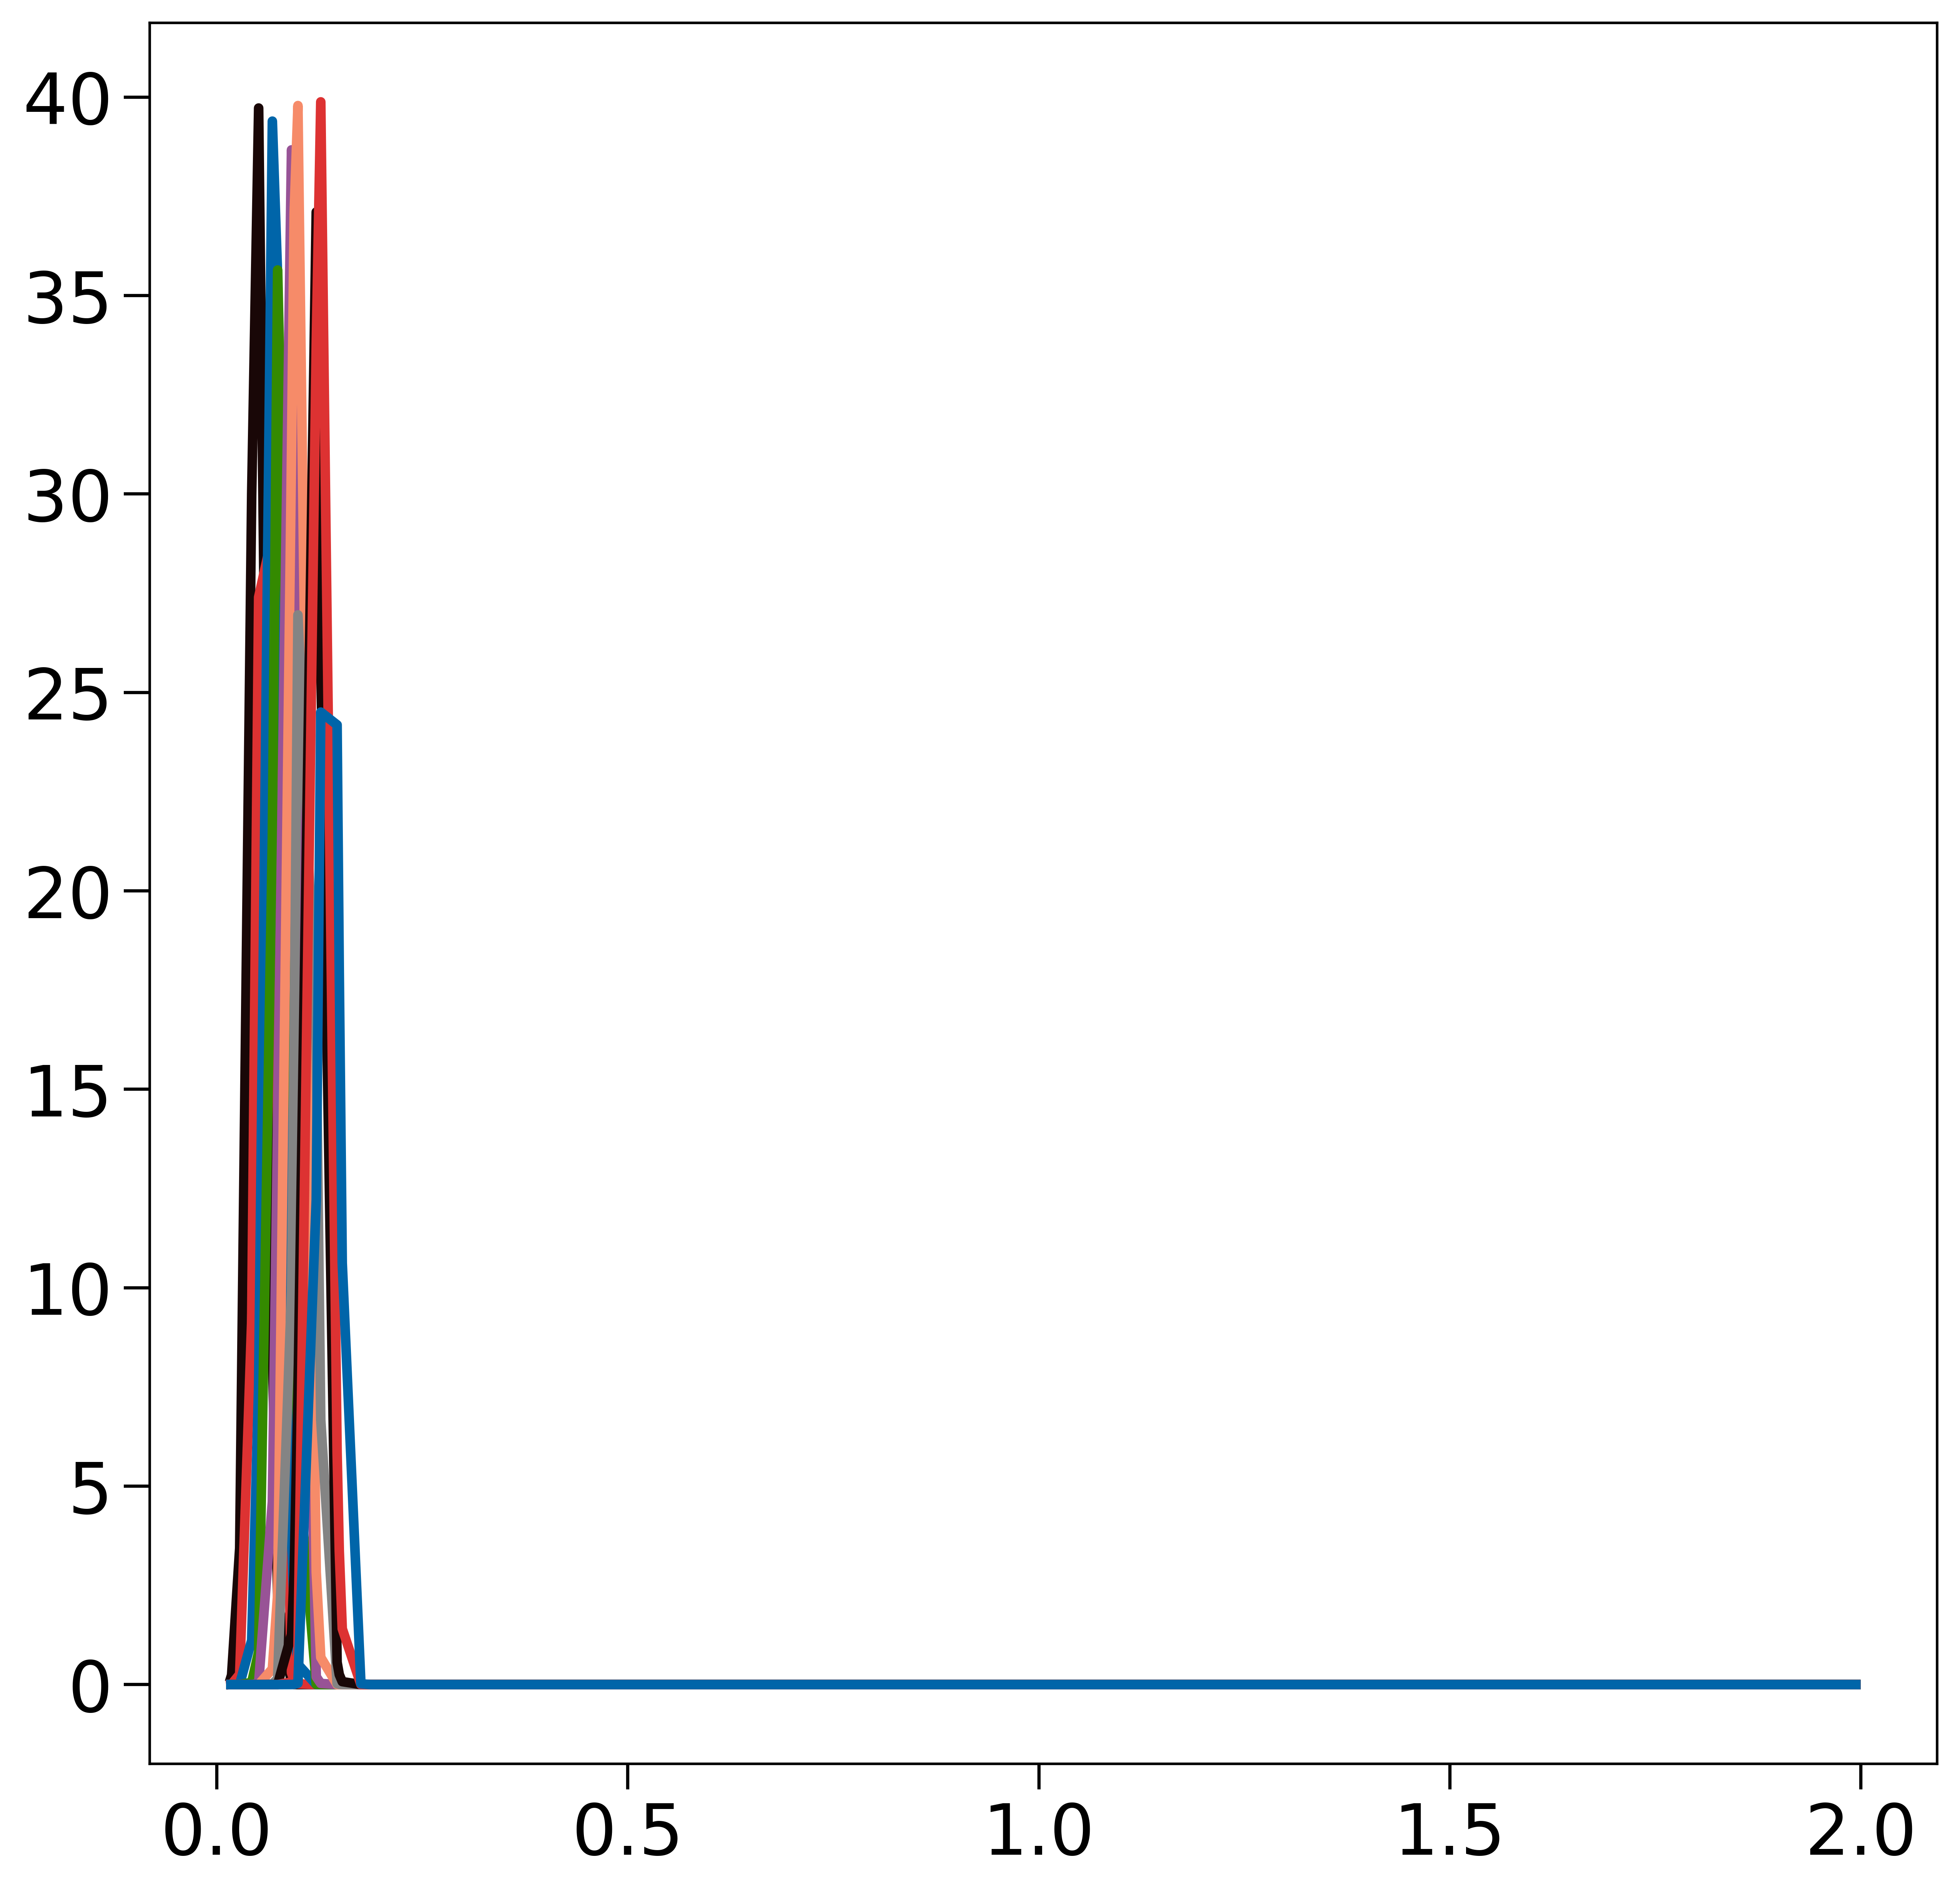

In [10]:
xnames = ['x'+str(i+1) for i in range(xtN[0])]
unames = ['u'+str(i+1) for i in range(xtN[0])]

muVec  = np.linspace(MuMinMax[0], MuMinMax[1], n_training)
np.savetxt(OutputDir+'/test/ext/Mu.csv', muVec[...,np.newaxis])

np.savetxt(OutputDir+'/test/ext/x0.csv', x0Vec[...,np.newaxis])

P      = xtN[0] * xtN[1]

u      = np.zeros((n_test,xtN[0]))
DF     = []
for i_case in range(n_test):
    
    Params[1]    = muVec[i_case]
    u[i_case,:]  = fOrig(0, x0Vec)

    DF_          = pd.DataFrame( np.tile(u[i_case,:][np.newaxis,...], (P,1)), columns=unames)
    
    xVec_        = np.linspace(xtMinVals[0], xtMaxVals[0], xtN[0])
    tVec_        = np.linspace(xtMinVals[1], xtMaxVals[1], xtN[1])
    xVec_, tVec_ = np.meshgrid(xVec_, tVec_)
    xVec         = xVec_.reshape(-1)
    tVec         = tVec_.reshape(-1)
    
    DF_['t']     = tVec
    DF_['x']     = xVec
    
    s            = fOrig(tVec, xVec)
    
    DF_['s']     = s
    
    DF_[['t']+['x']+['s']].to_csv(OutputDir+'/test/ext/y.csv.'+str(i_case+1), index=False)
    
    DF.append(DF_)

plt.plot(x0Vec, u.T)

DF = pd.concat(DF, axis=0)

np.savetxt(OutputDir+'/test/ext/u.csv', u)